Import modules and read CSV file

In [1]:
import pandas as p
import numpy as n
import matplotlib as m
%matplotlib inline

lp = p.read_csv("loanPrediction.csv")

Explore the data

In [2]:
lp.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Describe the data

In [3]:
lp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We have 614 records of data.  We see that we're missing some data in the following categories: LoanAmount (22 records), Loan_Amount_Term (14 records), and Credit_History (50 records).

If we're looking at averages, we see that average ApplicantIncome is 5,403; average CoapplicantIncome is 1,621; average LoanAmount is 146, average Loan_Amount_Term is 342, and average Credit_History is 84% (i.e. 84% of applicants meet credit guidelines).

To refresh our memory, here's what the fields correspond to:

Data

- Variable | Description
- Loan_ID | Unique Loan ID
- Gender | Male/ Female
- Married | Applicant married (Y/N)
- Dependents | Number of dependents
- Education | Applicant Education (Graduate/ Under Graduate)
- Self_Employed | Self employed (Y/N)
- ApplicantIncome | Applicant income
- CoapplicantIncome | Coapplicant income
- LoanAmount | Loan amount in thousands
- Loan_Amount_Term | Term of loan in months
- Credit_History | credit history meets guidelines
- Property_Area | Urban/ Semi Urban/ Rural
- Loan_Status | Loan approved (Y/N)

If we compare the mean to the 50% score, we can get an idea of how data is skewed.  The further off the mean is to the 50% score, the more skewed the data could be.

We have a few non-numerical fields.  Let's view their frequency to see if they make some sense.

In [4]:
lp.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
lp['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [6]:
lp['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [7]:
lp['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
lp['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [9]:
lp['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [10]:
lp['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [11]:
lp['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

We can see that most applicants are male, have no dependents, have graduated, are not self-employed, and live in an either urban or semi-urban environment.  Also, we seem to have a high rate of loan approval.

Let's now take a look at distributions of data by looking at some histograms for some fields.  Let's start with numeric fields.

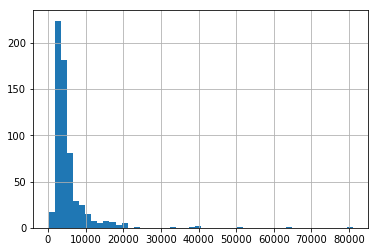

In [12]:
lp['ApplicantIncome'].hist(bins=50)

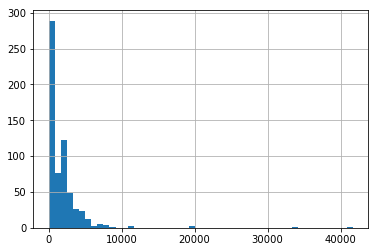

In [13]:
lp['CoapplicantIncome'].hist(bins=50)

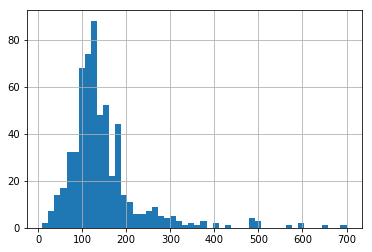

In [14]:
lp['LoanAmount'].hist(bins=50)

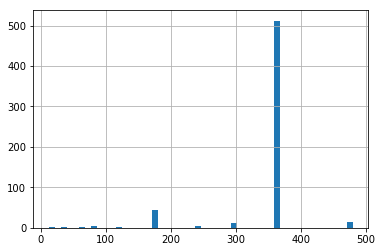

In [15]:
lp['Loan_Amount_Term'].hist(bins=50)

We'll avoid plotting Credit_History since that data isn't continuous.

Since we are trying to determine which factors can most easily predict whether an individual will get approved for a loan, I'll go ahead and analyze fields which I intuitively think are a contributing factor.  The main factor I would consider to be ApplicantIncome.  Let's plot a histogram and a boxplot for ApplicantIncome so we can determine if there are any outliers or extreme values.

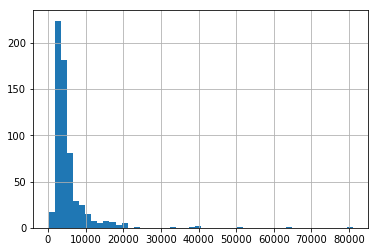

In [16]:
lp['ApplicantIncome'].hist(bins=50)

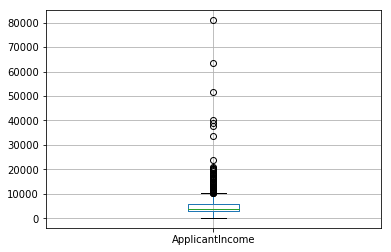

In [17]:
lp.boxplot(column='ApplicantIncome')

The graph above shows that there are outliers.  Since I believe ApplicantIncome is heavily influenced by Education, let's segregate this data by Education.  We'll use another box plot.

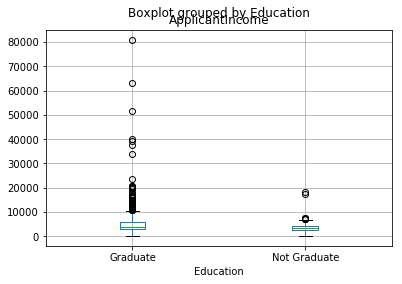

In [18]:
lp.boxplot(column='ApplicantIncome', by = 'Education')

The graph above shows us that there really is no big difference between the mean incomes of graduates and non-graduates.  We can see, however, that more graduates tend to apply for a loan (as also evidenced by the value count of the Education field (480 graduate vs. 134 non-graduates). 

Let's take a look at LoanAmount now.  We'll plot a histogram and a box plot.

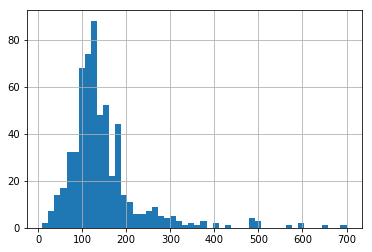

In [19]:
lp['LoanAmount'].hist(bins=50)

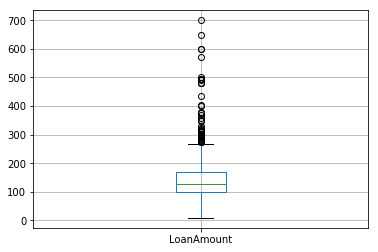

In [20]:
lp.boxplot(column='LoanAmount')

Similar to ApplicantIncome, we can also see that LoanAmount has outliers and extreme values.

Earlier we had already established that LoanAmount has missing values.  So in addition to both ApplicantIncome and LoanAmount having extreme values, LoanAmount also has missing values.  We need to find a way to fix this.  We obviously cannot add missing data to the data set - fortunately, we have other options.

We should refrain from using models until the data is 'clean'.  We've noticed that there's missing data so we need to estimate some value for the missing fields.  In particular we found both ApplicantIncome and LoanAmount to contain extreme values and LoanAmount to contain missing values.  

To get a better grasp of the data, we will/should also look at the other fields to see if they contain any useful information. 

Let's try to find missing variables in our whole data set - so we can get a picture of just what exactly is missing.

In [21]:
lp.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Since we're concerned with filling the values for LoanAmount (since that's the field that contains blanks), we need to try to find some solution that would fill those blanks.  One solution would be to use the mean of the data.  In this scenario, since we have an intuitive understanding of what can contribute to loan amount (that is, education level and, possibly, whether or not they're self-employed), let's see if there is some trend that we can use to adjsut our blank values accordingly.   Let's create a boxplot to see if that trend exists:

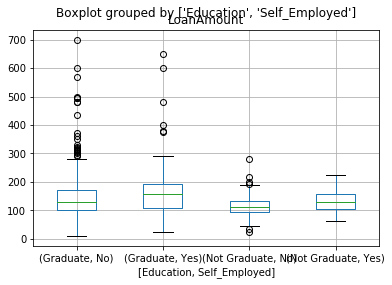

In [22]:
lp.boxplot(column='LoanAmount', by =['Education','Self_Employed'])

The graph above shows that there's some variation in the median of loan amount for each of these groups.  We'll use this to impute the values for LoanAmount.  Since we're looking at these two categories, education and self-employed, let's make sure that these two categories do not also have blank values.

Let's look at the count of Self_Employed.

In [23]:
lp['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

I'm going to make a judgment call and assign the blank values to No since a majority of applicants belong to the No group (roughly 86%)

In [24]:
 lp['Self_Employed'].fillna('No',inplace=True)

Education has no blank values so we're fine using that.

We'll code some function where we can extract the median value for all groups of values in Self_Employed and Education [(Graduate, No), (Graduate, Yes), (Not Graduate, No), (Not Graduate, Yes)].

In [25]:
#Create Pivot Table to extract these values
extractUniqueValues = lp.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=n.median)

#Return these values
def replacement(x):
 return extractUniqueValues.loc[x['Self_Employed'],x['Education']]

#Replace missing values
lp['LoanAmount'].fillna(lp[lp['LoanAmount'].isnull()].apply(replacement, axis=1), inplace=True)

The code block above replaces the missing values in LoanAmount with the median of each unique combination of categories for Self_Employed and Education.

At this point, we are done filling in blank values for the fields we are analyzing (ApplicantIncome and LoanAmount)

Now, we'll look at outlier data.  We'll apply a log function to both ApplicantIncome and LoanAMount to 'normalize' the curve.

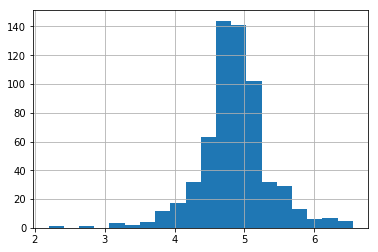

In [26]:
lp['LoanAmount_Normalized'] = n.log(lp['LoanAmount'])
lp['LoanAmount_Normalized'].hist(bins=20)

After 'normalizing' the LoanAmount, we see that this distribution seems more average.

For ApplicantIncome, a reason for the outliers may be because the applicants have coapplicants with higher incomes.  We'll also normalize this, but we'll include the income from the coapplicants as well.

We didn't do any further trasnformations on LoanAmount because although there were outliers for LoanAmount, we realize that this is possible due to the need of requesting high house loans.

We'll create a new field containing the sum of both applicant and coaaplicant, then apply the log function to normalize it.

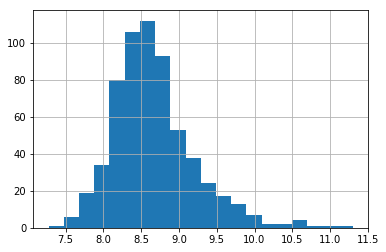

In [27]:
lp['TotalIncome'] = lp['ApplicantIncome'] + lp['CoapplicantIncome']
lp['TotalIncome_Normalized'] = n.log(lp['TotalIncome'])
lp['TotalIncome_Normalized'].hist(bins=20) 

The graph above shows a much better distribution of ApplicantIncome.

At this point, we need to solve the missing data for Gender, Married, Dependents, Loan_Amount_Term, and Credit_History.  For each of these categories, we'll be using different techniques - simply so we can practice the various options for handling missing data.

- Gender - Arbitrarily assign the 13 missing data as male since the majority of applicants are male.
- Married - Arbitrarily assign the 3 missing data as Married since the majority of applicants are Married.
- Dependents - Arbitrarily assign the 15 missing data as 0 since the majority of dependents are 0.
- Loan_Amount_Term - Since the mean is close to 50% of the data, we'll replace all missing values with the mean.
- Credit_History - I'll assume that if the Loan_Status was granted, they had good credit and if the Loan_Status was denied, they have bad credit.  I.E. Loan_Status = N then Credit_History = 0 and if Loan_Status = Y then Credit_History = 1.  To do this, I'm going to encode Loan_Status to a numerical value and then fill Credit_History with the corresponding Loan_Status values.

In [28]:
#Gender
lp['Gender'].fillna('Male', inplace=True)
#Married
lp['Married'].fillna('Yes', inplace=True)
#Dependents
lp['Dependents'].fillna('0', inplace=True)
#Loan_Amount_Term
lp['Loan_Amount_Term'].fillna(lp['Loan_Amount_Term'].mean(), inplace=True)
#Credit_History
lp['Loan_Status'] = lp['Loan_Status'].map(lambda x: 1 if x == 'Y' else 0) #Encode first
lp['Credit_History'].fillna(lp['Loan_Status'], inplace = True) #Then replace

Let's now verify that there are no blanks in the data and that no other rows were deleted.

In [29]:
lp.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
LoanAmount_Normalized     0
TotalIncome               0
TotalIncome_Normalized    0
dtype: int64

Let's describe the table now and see how much as changed.

In [30]:
lp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_Normalized,TotalIncome,TotalIncome_Normalized
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.764658,342.000000,0.833876,0.687296,4.857146,7024.705081,8.669414
std,6109.041673,2926.248369,84.145700,64.372489,0.372495,0.463973,0.496392,6458.663872,0.545102
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,2.197225,1442.000000,7.273786
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,4.607658,4166.000000,8.334712
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,4.852030,5416.500000,8.597205
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,5.104426,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,6.551080,81000.000000,11.302204


Let's print a few records and see how much as changed.

In [31]:
lp.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Normalized,TotalIncome,TotalIncome_Normalized
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,1,4.867534,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,5.587249,9613.0,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1,4.553877,3849.0,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0,5.062595,5540.0,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1,5.123964,5532.0,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0,5.855072,23809.0,10.077819


We'ren ow going to use scikit-lern to create predictive models with our data.  We also need to convert all our data to numeric values.  We'll do this by encoding the categorical data.

In [32]:
from sklearn.preprocessing import LabelEncoder

toEncode = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
encoder = LabelEncoder()
for x in toEncode:
    lp[x] = encoder.fit_transform(lp[x])

Let's print the set to see what it looks like now.

In [33]:
lp.dtypes 

Loan_ID                    object
Gender                      int64
Married                     int64
Dependents                  int64
Education                   int64
Self_Employed               int64
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area               int64
Loan_Status                 int64
LoanAmount_Normalized     float64
TotalIncome               float64
TotalIncome_Normalized    float64
dtype: object

We're going to insert a few models from scikit-learn - a logistic regression model, a decision tree model, and a random forest model.  
We will take a look at accuracy score, but more importantly we'll be looking at F1 score since this is a weighted average of precision and recall.  F1 score is a better metric for imbalanced data.
We'll also implement K-Fold cross validation to help us know the effectiveness of model performance.

In [34]:
#Import scikit learn models:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#Import K-Fold cross validation
from sklearn.cross_validation import KFold

#Creation a function to test the classification model and access performance:
def performance_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome]) #Fit
    predictions = model.predict(data[predictors]) #Predict
    #Print accuracy
    print ("Accuracy : ", metrics.accuracy_score(predictions,data[outcome]))
    #Print F1 score
    print ("F1 Score : ", metrics.f1_score(predictions,data[outcome]))
    
    #Perform KFold cross-validation with 10 folds
    kf = KFold(data.shape[0], n_folds=10)
    error = []
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : ",n.mean(error))
    
    #Fit the model again:
    model.fit(data[predictors],data[outcome]) 

C:\Users\emagsino\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Let's try to Logistic Regression model first

In [35]:
outcome = 'Loan_Status' #What we're trying to predict
model = LogisticRegression() #Our model
predictors = ['Credit_History'] #What we're trying to predict on
performance_model(model, lp,predictors,outcome)

Accuracy :  0.830618892508
F1 Score :  0.888650963597
Cross-Validation Score :  0.8307244844


Let's try Regression model on a different sent of variables.

In [36]:
model = LogisticRegression() #Our model
predictors = ['Credit_History','Education','Married','Self_Employed','Property_Area']
performance_model(model, lp,predictors,outcome)

Accuracy :  0.830618892508
F1 Score :  0.888650963597
Cross-Validation Score :  0.8307244844


We see here that Logistic Regression outputs the same scores across both tests.  We would think that adding more features increases the scores, but instead we realize that Credit_History is the domianting factor.

Let's see what the DecisionTreeClassifier can tell us.

Let's try DecisionTreeClassifier on the same initial set of variables.

In [37]:
model = DecisionTreeClassifier()
predictors = ['Credit_History']
performance_model(model, lp,predictors,outcome)

Accuracy :  0.830618892508
F1 Score :  0.888650963597
Cross-Validation Score :  0.8307244844


Now, let's try DecisionTreeClassifier again on the same (second) set of predictor variables.

In [38]:
model = DecisionTreeClassifier()
predictors = ['Credit_History','Education','Married','Self_Employed','Property_Area']
performance_model(model, lp,predictors,outcome)

Accuracy :  0.830618892508
F1 Score :  0.888172043011
Cross-Validation Score :  0.80639873083


Let's try DecisionTreeClassifier on a different set of variables.  This time, on numerical variables.

In [39]:
model = DecisionTreeClassifier()
predictors = ['Credit_History','Loan_Amount_Term','LoanAmount_Normalized']
performance_model(model, lp,predictors,outcome)

Accuracy :  0.899022801303
F1 Score :  0.928406466513
Cross-Validation Score :  0.721470121629


We see here that DecisionTreeClassifier outputs better scores.  Which is what we expected.  
In the first example, DecisionTreeClassifier outputs similar scores to Logistic Regression on the categorical variables and this is because Credit History is again dominating over them.  

If we run the model on numerical values, we see the scores increase!  Cross-validation score decreases a little - this is an early sign of overfitting.

Let's see what the RandomForestClassifier can tell us.  We'll just use Credit_History to get a baseline.  For now, we'll arbitrarily set N_estimators to 100).

In [40]:
model = RandomForestClassifier(n_estimators=100)
predictors = ['Credit_History']
performance_model(model, lp,predictors,outcome)

Accuracy :  0.830618892508
F1 Score :  0.888650963597
Cross-Validation Score :  0.8307244844


This time, we're going to use all the features since a RandomForestClassifier can return which features are most important - we can use this output to select the correct features.

In [41]:
model = RandomForestClassifier(n_estimators=100)
predictors = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_Normalized','TotalIncome_Normalized']
performance_model(model, lp,predictors,outcome)

Accuracy :  1.0
F1 Score :  1.0
Cross-Validation Score :  0.81287678477


Immediately, we can see that accuracy and F1 score is 100% - we overfit the data.  Since we used a RandomForestClassifier, we can determine which features are most important.

Let's print the important features.

In [42]:
impFeatures = p.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print (impFeatures)

Credit_History            0.323862
TotalIncome_Normalized    0.245022
LoanAmount_Normalized     0.204335
Dependents                0.046487
Property_Area             0.045264
Loan_Amount_Term          0.044388
Education                 0.024788
Married                   0.023404
Gender                    0.022008
Self_Employed             0.020441
dtype: float64


The table above shows us which features are the most important.  Let's use the top 3 features.

Let's also modify some parameters for RandomForestClassifier

In [43]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictors = ['Credit_History','TotalIncome_Normalized','LoanAmount_Normalized']
performance_model(model, lp,predictors,outcome)

Accuracy :  0.846905537459
F1 Score :  0.897603485839
Cross-Validation Score :  0.820967741935


Here we can see just how much we improved our scores by using the most important features!  Because the cross-validaation score is higher, it shows that this model is generalizing well!

Since we established the important features, let's run our previous models with the important features and see our scores and arrive at a conclusion.

In [44]:
model = LogisticRegression() #Our model
predictors = ['Credit_History','TotalIncome_Normalized','LoanAmount_Normalized']
performance_model(model, lp,predictors,outcome)

Accuracy :  0.830618892508
F1 Score :  0.888650963597
Cross-Validation Score :  0.8307244844


In [45]:
model = DecisionTreeClassifier()
predictors = ['Credit_History','TotalIncome_Normalized','LoanAmount_Normalized']
performance_model(model, lp,predictors,outcome)

Accuracy :  1.0
F1 Score :  1.0
Cross-Validation Score :  0.74450026441


In [46]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictors = ['Credit_History','TotalIncome_Normalized','LoanAmount_Normalized']
performance_model(model, lp,predictors,outcome)

Accuracy :  0.833876221498
F1 Score :  0.889370932755
Cross-Validation Score :  0.822554204125


Here we can conclude that the best model would probably be the RandomForestClassifier.  DecisionTreeClassifier overfits the data and the accuracy and F1 score for the LogisticRegression isn't as good as our RandomForestClassifier.

RandomForestClassifier seems to be the best balanced approach to this problem.